<center><h2>Jackson Problem 3.53 </h2></center>

""" From "COMPUTATIONAL PHYSICS" & "COMPUTER PROBLEMS in PHYSICS"
    by RH Landau, MJ Paez, and CC Bordeianu (deceased).
    Copyright R Landau, Oregon State Unv, MJ Paez, Univ Antioquia, 
    C Bordeianu, Univ Bucharest, 2020. 
    Please respect copyright & acknowledge our work."""
<p>
    (Jackson 3.53) A visualization of the potential of a charge outside of a grounded cylynder 
\begin{eqnarray*}
\Phi({\bf x},{\bf x'}) &=& \times \sinh \Bigl (\frac{x_{mn}z_<}{a}\Bigr ) \sinh \Bigl (\frac{x_{mn}(L-z_>)}{a}\Bigr )\\
\end{eqnarray*}

<IPython.core.display.Javascript object>


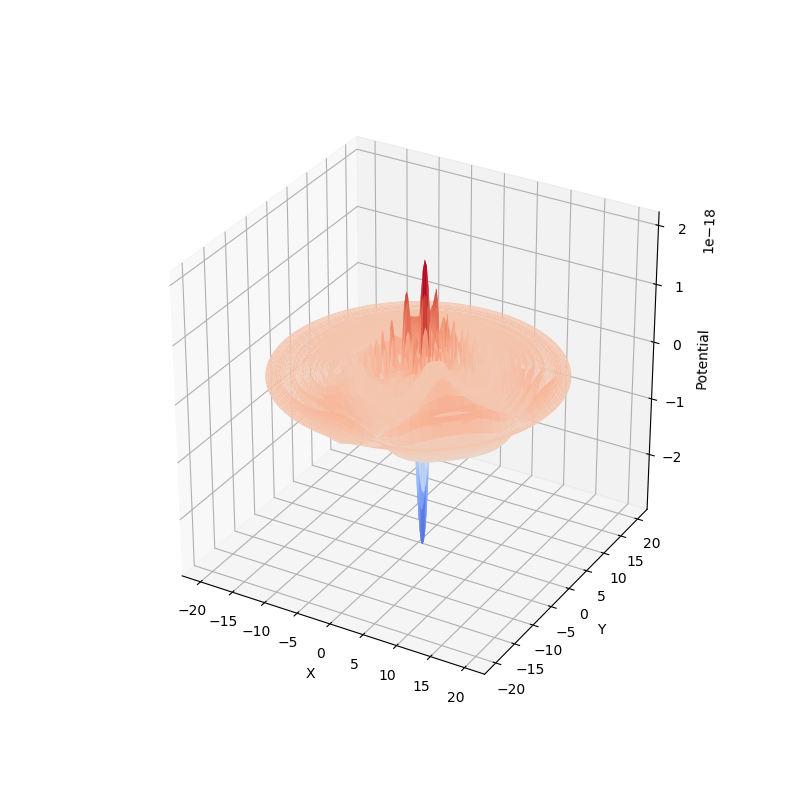

In [1]:
% matplotlib notebook

from scipy import special
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

a = 20.                     # cylinder radius
rhop = 12.0                 # charge location
phip = 7*np.pi/4.           # angle of q
zp = 15                     # z of q
L = 20                      # cylinder length
z = 18                      # find potential at this height
nzer = 80                   # number of m's must be integer
nzer2 = int(nzer/2)

def potential(rho,phi):     
   suma = 0                 
   for m in range (-nzer2,nzer2+1):    
       xmn = special.jn_zeros(m,nzer) #  zeros of jm
       xmnr = xmn*rho/a               # argument jm(r)
       xmnp = xmn*rhop/a              # argument jm(r')       
       jm1 = special.jn(m,xmnr)       # Bessel jm
       jm2 = special.jn(m,xmnp)        
       sh = np.sinh(xmn*L/a)          # hypersine 
       sh2 = np.sinh(xmn*zp/a)   
       sh3 = np.sinh(xmn*(L-z)/a)
       ex = np.cos(m*(phi-phip))      # real part e**im(f-f')
       jmp = special.jn(m+1,xmn)      # jm+1
       for n in range(0,nzer):        # sums over zeros 
           num = ex*jm1[n]*jm2[n]*sh2[n]*sh3[n]
           den = xmn[n]*sh[n]*jmp[n]**2
           pot = num/den
       poten = pot                     
       suma = suma+poten              # suma for all m
   return suma     

fig  =  plt.figure(figsize = (8,8))
ax   =  fig.add_subplot(111, projection = '3d')
rho  =  np.linspace(0, a, nzer)    # values of rho
phi  =  np.linspace(0, 2*np.pi, nzer)
R, P =  np.meshgrid(rho, phi)      # polar coords
X, Y   =  R*np.cos(P), R*np.sin(P) # cartesian
Z   =  potential(R,P)              # potential at (z,r,phi)
ax.plot_surface(X, Y, Z, rstride = 1, cstride = 1, cmap = cm.coolwarm)   
ax.set_xlabel('X')                           
ax.set_ylabel('Y')
ax.set_zlabel('Potential')
plt.show()